##텐서플로우를 이용한 다중 선형 회귀

단순 선형 회귀가 쉽기에 다중 선형 회귀도 쉬운 줄 알았다...하지만 결코 쉽지 않다...ㅠ.ㅠ 물론 독립변수만 늘어났을 뿐
대부분의 식을 그대로 사용해도 되므로 그냥 그렇게만 알고 넘어가면 이보다 쉬운 것도 없다. 하지만 수학적 사고방식이 모자란
문돌이에게는 변수가 하나 늘어난다는 것은 천지가 개벽하는 변화다.

예를들어 단순 선형 회귀는 그 결과를 그래프를 통해서 시각적으로 쉽게 확인이 가능했다. 그런데 다중 선형 회귀는 도대체
시각적으로 어떻게 표현해야 할지를 모르겠다. 그나마 독립변수가 2개인 경우는 3차원그래프로 설명을 해놓은 곳이 많아 그러려니
했는데 3개 이상부터는 도대체 어찌 할 수 있는지 할 수는 있는 것인지...ㅠ.ㅠ

일단은 cost 함수로 성공 여부를 가늠하면서 한 번 진행해보기로 했다.

일단 사용한 데이터는 아래 문서의 16쪽에 있는 예제의 데이터이다.
https://ita.kaist.ac.kr/data/board/ITA_MATLAB_09_02.pdf

###단순 선형 회귀에서 확장

In [8]:
# '텐서플로우 첫걸음'의 예제에서 구현된 변수. 여기서는 직접 회귀 분석에 사용되지는 않고 산점도 행렬을 그리는데만 사용됨
# num_points = 1000
vectors_set = [[2.0, 3.0, 3.2],[1.3, 1.1, 3.0],[2.4, 3.5, 3.6],[1.5, 2.5, 2.6],[0.6, 1.9, 0.6],[2.0, 2.8, 3.5],
               [1.0, 1.3, 2.1], [2.0, 3.3, 3.4], [1.3, 2.0, 2.8], [0.9, 1.0, 2.3]
               ]

#vectors_set2 = [[36.2, 206.2, 1.0, 32.0],[39.0, 218.6, 4.0, 39.0],[81.7, 264.6, 4.0, 41.0],[39.0, 330.5, 2.0, 33.0],
#               [68.3, 334.7, 3.0, 37.0],[106.3, 365.6, 4.0, 31.0],[123.9, 379.3, 5.0, 35.0],[114.8, 456.4, 6.0, 29.0], 
#               [97.0, 502.7, 3.0, 27.0], [100.2, 531.0, 7.0, 36.0]
#               ]

최초에 "텐서플로우 첫걸음"의 예제 노트북으로 시작을 했기에 코드역시 기본적으로는 예제와 동일한 구조다.

In [9]:
y_data = [2.0, 1.3, 2.4, 1.5, 0.6, 2.0, 1.0, 2.0, 1.3, 0.9]
x1_data = [3.0, 1.1, 3.5, 2.5, 1.9, 2.8, 1.3, 3.3, 2.0, 1.0]
x2_data = [3.2, 3.0, 3.6, 2.6, 0.6, 3.5, 2.1, 3.4, 2.8, 2.3]
#x3_data = [v[3] for v in vectors_set]

참고 : 
위에서 기존에 사용하던 vectors_set이라는 변수를 그대로 살려놓았는데 그 이유는 다중 회귀 분석을 시각화 하는 방법 중 산점도 행렬을 그리기 위해서다.
다중 회귀를 구성하는 각 변수들의 관계를 볼 수 있는 산점도 행렬을 만들 수 있도록 데이터를 구조화 해주는 pandas라는 라이브러리를 찾아서 사용해 보았는데.
이 pandas에서 데이터를 만들 때 조금 더 편하게 사용할 수 있다. 
아래 코드를 수행했을 때 처음 나오는 그래프가 바로 산포도 행렬이다.

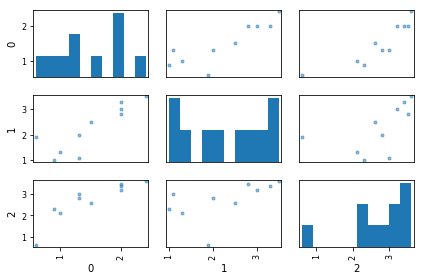

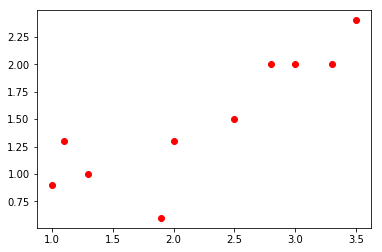

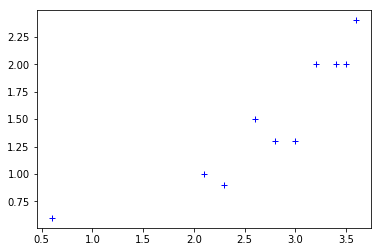

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame(vectors_set)

pd.tools.plotting.scatter_matrix(df)
plt.tight_layout()
plt.show()

plt.plot(x1_data, y_data, 'ro')
plt.show()
plt.plot(x2_data, y_data, 'b+')
plt.show()
#plt.plot(x3_data, y_data, 'cs')
#plt.show()

그리고 다음과 같이 가설 함수를 만든다. 다중 회귀 분석의 가설함수는 단순 회귀 분석의 가설함수에서 추가되는 독립 변수에 대해 `W * X를` 추가로
더해주면 된다. 즉 기존 단순 선형 회귀의 가설 함수가 y = W * x + b였다면 독립변수가 2개인 다중 회귀의 가설함수는 y = W1 * x1 + W2 * x2 + b의
형식이 되는 것이다. 이런 식으로 독립변수가 늘어남에 따라 가설함수는 다음과 같이 표현할 수 있다.

함수 이미지

위 예제 데이터는 독립변수가 2개이기 때문에 아래와 같이 가설 함수를 만들 수 있다.

In [ ]:
import tensorflow as tf

W1 = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
W2 = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
#W3 = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
#b = tf.Variable(tf.random_uniform([1], 88.0, 89.0))
b = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
y = W1 * x1_data + W2 * x2_data + b

###가설 함수 단순화 하기

위와 같은 진행은 다중 선형 회귀 가설 함수의 일반 공식에서 보는 바와 같이 독립변수가 늘어나는 만큼 공식이 한도 끝도 없이 늘어날 수가 있다.
그래서 이 공식을 조금 더 간단하게 표현하기 위해 `행렬의 곱`을 이용하여 표현할 수 있다. 이 `행렬 곱`의 성질을 이용하면 b까지도 간단하게
정리할 수 있다. 아래 공식과 같이 표현이 가능한 것이다.

행렬곱1
행렬곱2
행렬곱3

위 방법을 이용하여 가설함수를 다시 구성하면 다음과 같이 간단하게 정리할 수 있게된다.
먼저 두 개의 독립변수를 하나의 벡터로 만들어보자

In [ ]:
x_data = [[3.0, 1.1, 3.5, 2.5, 1.9, 2.8, 1.3, 3.3, 2.0, 1.0],
          [3.2, 3.0, 3.6, 2.6, 0.6, 3.5, 2.1, 3.4, 2.8, 2.3]]
y_data = [2.0, 1.3, 2.4, 1.5, 0.6, 2.0, 1.0, 2.0, 1.3, 0.9]

x1_data, x2_data 두개의 변수가 x_data 하나의 변수에 모두 포함되었다. y_data는 그냥 사용하면 된다.
다음은 W1과 W2도 하나로 합쳐보자

In [ ]:
W = tf.Variable(tf.random_uniform([1, 2], -1.0, 1.0))
b = tf.Variable(tf.random_uniform([1], -1.0, 1.0))

바뀐 부분은 tf.random_uniform의 첫번째 파라미터가  `[1]`에서 `[1, 2]`로 바뀐 것이다. 즉, 하나의 행만 가지고 있던 배열 형태에서 
1행 2열 형태의 벡터로 바꾸었다. 아직까지는 b는 그대로 사용을 하자.

이제 행렬 곱셈을 해보자. 텐서플로우에서 행렬 곱셈을 해주는 함수는 matmul이다.

In [ ]:
y = tf.matmul(W, x_data) + b

`y = W1 * x1_data + W2 * x2_data + b`라는 긴 공식이 `y = tf.matmul(W, x_data) + b`로 짧아졌다.
새삼 수학적 사고의 대단함을 느끼는 순간이었다.

b까지 단순화 시키려면 다음과 같이 하면 된다.

In [2]:
import tensorflow as tf

x_data = [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
          [3.0, 1.1, 3.5, 2.5, 1.9, 2.8, 1.3, 3.3, 2.0, 1.0],
          [3.2, 3.0, 3.6, 2.6, 0.6, 3.5, 2.1, 3.4, 2.8, 2.3]]
y_data = [2.0, 1.3, 2.4, 1.5, 0.6, 2.0, 1.0, 2.0, 1.3, 0.9]

W = tf.Variable(tf.random_uniform([1, 3], -1.0, 1.0))
y = tf.matmul(W, x_data)

정말 단순해졌다.

이후 진행은 단순회귀 분석과 동일하다. loss 함수를 정의하고 최적화 방법은 학습속도 0.01인 그래디언트 디센트를 사용한다.

In [3]:
loss = tf.reduce_mean(tf.square(y - y_data))
optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(loss)

그리고 모든 변수를 초기화하고 세션을 시작한다.

In [4]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

일단 10000번 정도 반복을 하면서 1000번 째마다 현재 step과 W와 loss값을 출력하여 보았다.
`행렬 곱`을 이용하여 식을 단순화 하기 전에는 W1, W2, b의 값이 각각 별개의 배열로 출력되었으나
식을 단순화 한 후에는 W가 하나의 벡터로 전체 값을 모두 표시해준다. 

In [7]:
for step in range(10000):
    sess.run(train)
    if step % 1000 == 0 :
        print(step, sess.run(W), sess.run(loss))

(0, array([[ 0.77657259,  0.304876  ,  0.05037546]], dtype=float32), 0.10678037)
(1000, array([[-0.0653717 ,  0.31436804,  0.32436851]], dtype=float32), 0.01154841)
(2000, array([[-0.24788393,  0.33180454,  0.3721334 ]], dtype=float32), 0.0072818799)
(3000, array([[-0.28713715,  0.33556959,  0.38239372]], dtype=float32), 0.0070845596)
(4000, array([[-0.29557922,  0.3363795 ,  0.38460028]], dtype=float32), 0.0070754252)
(5000, array([[-0.29739448,  0.33655375,  0.38507465]], dtype=float32), 0.0070749982)
(6000, array([[-0.2977854 ,  0.33659121,  0.38517687]], dtype=float32), 0.0070749833)
(7000, array([[-0.29786775,  0.33659837,  0.38519898]], dtype=float32), 0.007074981)
(8000, array([[-0.29788083,  0.33659986,  0.38520217]], dtype=float32), 0.0070749745)
(9000, array([[-0.29788083,  0.33659986,  0.38520217]], dtype=float32), 0.0070749745)


일단 결과는 위와 같이 나왔는데 이 결과는 비용함수의 결과가 상당히 낮은 값임에도 불구하고 예제 데이터가 있던 문서에서 정리한 결과 값과 
상당한 차이를 보인다. 왜 차이가 나는지 어떻게 이 차이를 줄이도록 조정할 수 있는지는 아직 잘 모르겠다.

문서 상의 결과값 : y(x1,x2) = -0.4503 + 0.3067 * x1 + 0.4589 * x2

###정리

이번 포스팅 내용울 3줄 정리해보도록 하자.

1. 다중 선형 회귀는 단순 선형 회귀에서 독립변수의 수만 늘어난 형태이다.
2. 가설함수는 `y = W1 * x1 + W2 * x2 + ... Wn * xn + b`의 형태이다.
3. 비용함수는 단순 회귀 분석과 동일하다.

적절한 값을 구한다는 목적만 생각한다면 달리 어려운 부분은 없다. 하지만 자꾸 호기심이 일어 몇가지 의문사항이 생겼다.

1. 3개 이상의 독립변수가 있는 경우에는 시각화 할 수 있는 방법(그래프 그리는 방법)이 없는가?
2. 